# The z-Distribution <hr style = "border:2.5px solid #0000FF"></hr>

<b> Byron Mojica </b>
<br>Comptech Student T09
<br> 01/27/2026

In [ ]:
# Imports and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# load dataset

df = pd.read_csv(r'DATASET\transformer-voltage.csv',
                 index_col = 'Sample',
                 delimiter= ",")

In [ ]:
# summary of statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [ ]:
# summary of statistics

df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [ ]:
# z-critical for two-tailed test

alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(1.959963984540054)

In [ ]:
# confidence interval

pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence=0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

print(f"95% Confidence Level: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Level: (118.50, 122.08)


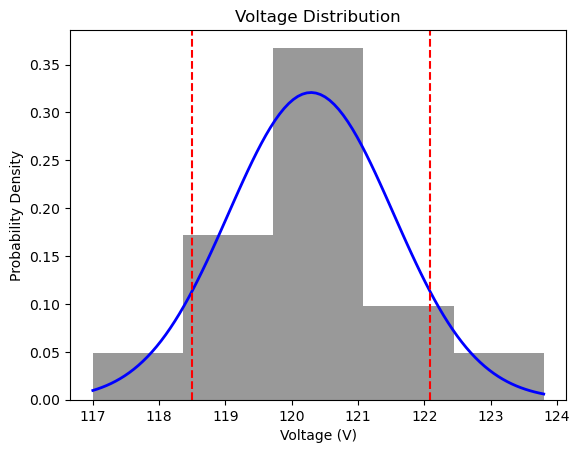

In [52]:
# voltage distribution

mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution plot

x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot (x,p,
          linewidth = 2,
          color = 'blue')

# histogram

plt.hist (df['Voltage'],
          bins = 5,
          density = True,
          alpha = 0.8,
          color = 'gray')

plt.title ('Voltage Distribution')
plt.xlabel('Voltage (V)')
plt.ylabel('Probability Density')

plt.axvline (x = ci_lower,
             color = 'red',
             linestyle = '--',
             label = '95% CI Lower Bound')

plt.axvline (x = ci_upper,
             color = 'red',
             linestyle = '--',
             label = '95% CI Upper Bound')

plt.show()